In [1]:
%matplotlib inline

#data processing

import numpy as np
import pandas as pd

#data visualization

import matplotlib.pyplot as plt
import seaborn as sns


In [124]:
%config IPCompleter.greedy=True

In [2]:
pokemon = pd.read_csv('pokemon.csv')
combats = pd.read_csv('combats.csv')

In [3]:
display(pokemon.head())
display(pokemon.describe())
display(pokemon.shape)
pokemon.info()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


(800, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [4]:
display(combats.head())
display(combats.describe())
display(combats.info())

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


,First_pokemon,Second_pokemon,Winner
count,50000.000000,50000.000000,50000.000000
mean,400.495640,403.159660,408.890100
std,229.549429,230.083644,231.159961
min,1.000000,1.000000,1.000000
25%,203.000000,207.000000,206.000000
50%,399.000000,402.000000,422.000000
75%,597.250000,602.000000,606.000000
max,800.000000,800.000000,800.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
First_pokemon     50000 non-null int64
Second_pokemon    50000 non-null int64
Winner            50000 non-null int64
dtypes: int64(3)
memory usage: 1.1 MB


None

In [5]:
pokemon.loc[pokemon['Name'].isnull()==True]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False


In [6]:
pokemon.loc[pokemon['Name']=='Abra']

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
68,69,Abra,Psychic,NaN,25,20,15,105,55,90,1,False


In [7]:
pokemon.loc[62 , 'Name']="Primeape"

In [8]:
pokemon.loc[62]

#                   63
Name          Primeape
Type 1        Fighting
Type 2             NaN
HP                  65
Attack             105
Defense             60
Sp. Atk             60
Sp. Def             70
Speed               95
Generation           1
Legendary        False
Name: 62, dtype: object

In [9]:
pokemon.columns
combats.columns

Index(['First_pokemon', 'Second_pokemon', 'Winner'], dtype='object')

In [10]:
pokemon['Total'] = pokemon['HP'] + pokemon['Attack'] + pokemon['Defense'] + pokemon['Sp. Atk'] + pokemon['Sp. Def'] + pokemon['Speed']

In [11]:
cols = ['first' , '']

In [12]:
no_total_dict = dict(zip(pokemon['#'],pokemon['Total']))
cols = ['First_pokemon' , 'Second_pokemon' , 'Winner']

In [13]:
combat_dif = combats[cols].replace(no_total_dict)

In [14]:
display(combat_dif.head())

,First_pokemon,Second_pokemon,Winner
0,300,340,340
1,580,580,580
2,405,485,485
3,250,485,485
4,495,505,495


In [15]:
combats['Losers'] = combats.apply(lambda x: x['First_pokemon'] if x['First_pokemon'] !=x['Winner'] else x['Second_pokemon'],axis=1)

In [16]:
combats.head()

,First_pokemon,Second_pokemon,Winner,Losers
0,266,298,298,266
1,702,701,701,702
2,191,668,668,191
3,237,683,683,237
4,151,231,151,231


In [17]:
combats['is_first_win'] = combats['First_pokemon'] == combats['Winner']
combats['diff_stat'] = combat_dif['First_pokemon']-combat_dif['Second_pokemon']

In [18]:
display(combats.head())

,First_pokemon,Second_pokemon,Winner,Losers,is_first_win,diff_stat
0,266,298,298,266,False,-40
1,702,701,701,702,False,0
2,191,668,668,191,False,-80
3,237,683,683,237,False,-235
4,151,231,151,231,True,-10


In [19]:
#Merging the DataBase
nfirsts = combats['First_pokemon'].value_counts()
nseconds = combats['Second_pokemon'].value_counts()
nfights = nfirsts + nseconds

In [21]:
fight_df = pd.DataFrame({
    'nfights':nfights,
    'nwins':combats['Winner'].value_counts()
},columns = ['nfights','nwins'])

In [22]:
fight_df['Win_ratio'] = fight_df['nwins']/fight_df['nfights']

In [23]:
fight_df = fight_df.sort_values(by='Win_ratio')
display(fight_df.tail())

,nfights,nwins,Win_ratio
20,119,115.0,0.966387
704,125,121.0,0.968000
513,119,116.0,0.974790
155,129,127.0,0.984496
231,135,NaN,NaN


In [24]:
fight_df.info()
display(fight_df.loc[fight_df['Win_ratio'].isnull()])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 290 to 231
Data columns (total 3 columns):
nfights      784 non-null int64
nwins        783 non-null float64
Win_ratio    783 non-null float64
dtypes: float64(2), int64(1)
memory usage: 24.5 KB


,nfights,nwins,Win_ratio
231,135,NaN,NaN


In [25]:
fight_df.loc[231,['nfights','nwins','Win_ratio']] = 0

In [26]:
fight_df['#']= fight_df.index
pokemon_fight_df = pokemon.copy()
win_ratio_dict = dict(zip(fight_df['#'],fight_df['Win_ratio']))
pokemon_fight_df['Win_ratio'] = pokemon_fight_df['#'].replace(win_ratio_dict)
display(pokemon_fight_df.head())

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total,Win_ratio
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625,0.560000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309,0.491071


In [27]:
pokemon_fight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 14 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
Total         800 non-null int64
Win_ratio     800 non-null float64
dtypes: bool(1), float64(1), int64(9), object(3)
memory usage: 82.1+ KB


In [28]:
non_fight_pokemon_df = pokemon_fight_df.loc[(pokemon_fight_df['Win_ratio']>1) | pokemon_fight_df['Win_ratio'].isnull()]

In [29]:
display(non_fight_pokemon_df)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total,Win_ratio
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,530,12.0
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,1,False,300,33.0
45,46,Wigglytuff,Normal,Fairy,140,70,45,85,50,45,1,False,435,46.0
65,66,Poliwag,Water,NaN,40,50,40,40,40,90,1,False,300,66.0
77,78,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False,490,78.0
89,90,Magneton,Electric,Steel,50,60,95,120,70,70,1,False,465,90.0
143,144,Ditto,Normal,NaN,48,48,48,48,48,48,1,False,288,144.0
182,183,Ariados,Bug,Poison,70,90,70,60,60,40,2,False,390,183.0
235,236,Ursaring,Normal,NaN,90,130,75,75,75,55,2,False,500,236.0
321,322,Hariyama,Fighting,NaN,144,120,60,40,60,50,3,False,474,322.0


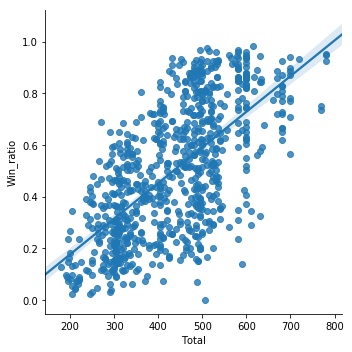

In [30]:
# Data of pokemon that have fight and those haveing fight_ratio <1
have_fight_df = pokemon_fight_df.loc[pokemon_fight_df['Win_ratio']<=1]
#Visualising th data 
sns.lmplot(x = 'Total' , y= 'Win_ratio' , data = have_fight_df)

In [31]:
# as the data is in straight line so it can be predicted linearly using logistic regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [32]:
lr.fit(have_fight_df['Total'].values.reshape(-1,1),have_fight_df['Win_ratio'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
non_fight_pokemon_df['Win_ratio'] = lr.predict(non_fight_pokemon_df['Total'].values.reshape(-1,1)) 


/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
display(non_fight_pokemon_df)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total,Win_ratio
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,530,0.632079
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,1,False,300,0.314586
45,46,Wigglytuff,Normal,Fairy,140,70,45,85,50,45,1,False,435,0.500941
65,66,Poliwag,Water,NaN,40,50,40,40,40,90,1,False,300,0.314586
77,78,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False,490,0.576863
89,90,Magneton,Electric,Steel,50,60,95,120,70,70,1,False,465,0.542353
143,144,Ditto,Normal,NaN,48,48,48,48,48,48,1,False,288,0.298021
182,183,Ariados,Bug,Poison,70,90,70,60,60,40,2,False,390,0.438823
235,236,Ursaring,Normal,NaN,90,130,75,75,75,55,2,False,500,0.590667
321,322,Hariyama,Fighting,NaN,144,120,60,40,60,50,3,False,474,0.554777


In [35]:
frames = [have_fight_df , non_fight_pokemon_df]
database_pokemon = pd.concat(frames)
database_pokemon.info()
database_pokemon.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 781
Data columns (total 14 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
Total         800 non-null int64
Win_ratio     800 non-null float64
dtypes: bool(1), float64(1), int64(9), object(3)
memory usage: 88.3+ KB


Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary', 'Total', 'Win_ratio'],
      dtype='object')

In [36]:
train_df = combats.copy()
hp_dict = dict(zip(database_pokemon['#'],database_pokemon['HP']))
attack_dict = dict(zip(database_pokemon['#'],database_pokemon['Attack']))
defense_dict = dict(zip(database_pokemon['#'],database_pokemon['Defense']))
sp_atk_dict = dict(zip(database_pokemon['#'],database_pokemon['Sp. Atk']))
sp_def_dict = dict(zip(database_pokemon['#'],database_pokemon['Sp. Def']))
speed_dict = dict(zip(database_pokemon['#'],database_pokemon['Speed']))
total_dict = dict(zip(database_pokemon['#'],database_pokemon['Total']))
win_ratio_dict = dict(zip(database_pokemon['#'],database_pokemon['Win_ratio']))


In [37]:
train_df['first_hp'] =  train_df['First_pokemon'].replace(hp_dict)
train_df['first_attack'] =  train_df['First_pokemon'].replace(attack_dict)
train_df['first_defense'] =  train_df['First_pokemon'].replace(defense_dict)
train_df['first_sp_atk'] =  train_df['First_pokemon'].replace(sp_atk_dict)
train_df['first_sp_def'] =  train_df['First_pokemon'].replace(sp_def_dict)
train_df['first_speed'] =  train_df['First_pokemon'].replace(speed_dict)
train_df['first_total'] =  train_df['First_pokemon'].replace(total_dict)
train_df['first_win_ratio'] =  train_df['First_pokemon'].replace(win_ratio_dict)
train_df['second_hp'] =  train_df['Second_pokemon'].replace(hp_dict)
train_df['second_attack'] =  train_df['Second_pokemon'].replace(attack_dict)
train_df['second_defense'] =  train_df['Second_pokemon'].replace(defense_dict)
train_df['second_sp_atk'] =  train_df['Second_pokemon'].replace(sp_atk_dict)
train_df['second_sp_def'] =  train_df['Second_pokemon'].replace(sp_def_dict)
train_df['second_speed'] =  train_df['Second_pokemon'].replace(speed_dict)
train_df['second_total'] =  train_df['Second_pokemon'].replace(total_dict)
train_df['second_win_ratio'] =  train_df['Second_pokemon'].replace(win_ratio_dict)
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
First_pokemon       50000 non-null int64
Second_pokemon      50000 non-null int64
Winner              50000 non-null int64
Losers              50000 non-null int64
is_first_win        50000 non-null bool
diff_stat           50000 non-null int64
first_hp            50000 non-null int64
first_attack        50000 non-null int64
first_defense       50000 non-null int64
first_sp_atk        50000 non-null int64
first_sp_def        50000 non-null int64
first_speed         50000 non-null int64
first_total         50000 non-null int64
first_win_ratio     50000 non-null float64
second_hp           50000 non-null int64
second_attack       50000 non-null int64
second_defense      50000 non-null int64
second_sp_atk       50000 non-null int64
second_sp_def       50000 non-null int64
second_speed        50000 non-null int64
second_total        50000 non-null int64
second_win_ratio    50000 non

In [38]:
train_df['is_first_win'] = train_df.apply(lambda x: 1 if x['is_first_win']==True else 0, axis=1) 

In [39]:
display(train_df.head())

,First_pokemon,Second_pokemon,Winner,Losers,is_first_win,diff_stat,first_hp,first_attack,first_defense,first_sp_atk,...,first_total,first_win_ratio,second_hp,second_attack,second_defense,second_sp_atk,second_sp_def,second_speed,second_total,second_win_ratio
0,266,298,298,266,0,-40,50,64,50,45,...,300,0.227273,70,70,40,60,40,60,340,0.424779
1,702,701,701,702,0,0,91,90,72,90,...,580,0.896000,91,129,90,72,90,108,580,0.853659
2,191,668,668,191,0,-80,55,40,85,80,...,405,0.236220,75,75,75,125,95,40,485,0.156716
3,237,683,683,237,0,-235,40,40,40,70,...,250,0.032520,77,120,90,60,90,48,485,0.278571
4,151,231,151,231,1,-10,70,60,125,115,...,495,0.355072,20,10,230,10,230,5,505,0.000000


In [40]:
no_need_columns = ['First_pokemon', 'Second_pokemon', 'Winner', 'Losers']
train_df = train_df.drop(no_need_columns, axis=1)

In [126]:
y = train_df['is_first_win']
no_need_columns = ['first_win_ratio','second_win_ratio','diff_stat','is_first_win']
# no_need_columns = ['diff_stat','is_first_win']
x =  train_df.drop(no_need_columns , axis=1)


In [127]:
from sklearn.model_selection import train_test_split

In [128]:
xtrain , xtest , ytrain , ytest = train_test_split(x , y , train_size = 0.8 , random_state= 15) 

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [129]:
display(xtrain.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 45570 to 7624
Data columns (total 14 columns):
first_hp          40000 non-null int64
first_attack      40000 non-null int64
first_defense     40000 non-null int64
first_sp_atk      40000 non-null int64
first_sp_def      40000 non-null int64
first_speed       40000 non-null int64
first_total       40000 non-null int64
second_hp         40000 non-null int64
second_attack     40000 non-null int64
second_defense    40000 non-null int64
second_sp_atk     40000 non-null int64
second_sp_def     40000 non-null int64
second_speed      40000 non-null int64
second_total      40000 non-null int64
dtypes: int64(14)
memory usage: 4.6 MB


None

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [131]:
lda = LinearDiscriminantAnalysis()
lda.fit(xtrain,ytrain)
round(lda.score(xtest,ytest)*100,2)

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


89.03

In [132]:
ridge = Ridge()
ridge.fit(xtrain,ytrain)
round(ridge.score(xtest,ytest)*100 , 2)

47.46

In [133]:
lasso = Lasso()
lasso.fit(xtrain,ytrain)
round(lasso.score(xtest,ytest)*100,3)

45.661

In [134]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
round(rfc.score(xtest , ytest)*100 , 2)

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


93.69

In [135]:
dtc = DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
round(dtc.score(xtest , ytest)*100 , 2)

92.02

In [136]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
round(lr.score(xtest , ytest)*100 , 2)
# acc['Logistic Regression']

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


89.15

In [137]:
per = Perceptron()
per.fit(xtrain,ytrain)
round(per.score(xtest , ytest)*100 , 2)

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


85.89

In [138]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
round(knn.score(xtest , ytest)*100 , 2)

85.24

In [139]:
gnb = GaussianNB()
gnb.fit(xtrain,ytrain)
round(gnb.score(xtest,ytest)*100,3)

78.42

In [140]:
test = pd.read_csv('tests.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
First_pokemon     10000 non-null int64
Second_pokemon    10000 non-null int64
dtypes: int64(2)
memory usage: 156.3 KB


In [141]:
test['first_hp'] =  test['First_pokemon'].replace(hp_dict)
test['first_attack'] =  test['First_pokemon'].replace(attack_dict)
test['first_defense'] =  test['First_pokemon'].replace(defense_dict)
test['first_sp_atk'] =  test['First_pokemon'].replace(sp_atk_dict)
test['first_sp_def'] =  test['First_pokemon'].replace(sp_def_dict)
test['first_speed'] =  test['First_pokemon'].replace(speed_dict)
test['first_total'] =  test['First_pokemon'].replace(total_dict)
test['second_hp'] =  test['Second_pokemon'].replace(hp_dict)
test['second_attack'] =  test['Second_pokemon'].replace(attack_dict)
test['second_defense'] =  test['Second_pokemon'].replace(defense_dict)
test['second_sp_atk'] =  test['Second_pokemon'].replace(sp_atk_dict)
test['second_sp_def'] =  test['Second_pokemon'].replace(sp_def_dict)
test['second_speed'] =  test['Second_pokemon'].replace(speed_dict)
test['second_total'] =  test['Second_pokemon'].replace(total_dict)

In [148]:
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
first_hp          10000 non-null int64
first_attack      10000 non-null int64
first_defense     10000 non-null int64
first_sp_atk      10000 non-null int64
first_sp_def      10000 non-null int64
first_speed       10000 non-null int64
first_total       10000 non-null int64
second_hp         10000 non-null int64
second_attack     10000 non-null int64
second_defense    10000 non-null int64
second_sp_atk     10000 non-null int64
second_sp_def     10000 non-null int64
second_speed      10000 non-null int64
second_total      10000 non-null int64
dtypes: int64(14)
memory usage: 1.1 MB


None

In [147]:
no_need_columns = ['First_pokemon', 'Second_pokemon',]
test = test.drop(no_need_columns, axis=1)

In [149]:
 y = rfc.predict(test)

In [153]:
output = pd.DataFrame({'Winner': y})

In [154]:
output.to_csv('Result.csv',index=False)